<a href="https://colab.research.google.com/github/Creatrohit9/AIRBNB-PROJECT-1-CAPSTON/blob/main/MD1WK4ROHIT_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

#   Start This journey with full of Ups and downs with some Motivational Quots

#''Meri Kasti Mai Bhavar Bandhkar Duniya Khus Hai
# Duniya Ddekhegi Ki Sahil Per pahucha Kaun hai''

# **Life doesn’t get easier or more forgiving, we get stronger and more resilient**.
~ Steve Maraboli

# **Ultimately, the greatest lesson that COVID-19 can teach humanity is that we are all in this together**.
~ Kiran Mazumdar-Shaw

#    We do lots of google as well kaggle for this research analysis see work approch of
#    multiple data scientist .
    

0.1-**Case study-** 
   the purpose of this case study is to analyzing the pricing trend between property type and neighbourhood or any  correlation observation  between review and price 

**0.2-Data cleaning,transformation and Analysis**

# *Libraries Prepration for the  Data Analysis and plot*

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
from numpy import math        #used for perform math on scalar data
from numpy import loadtxt     #fast reader for simple text files
import matplotlib.pyplot as plt
%matplotlib inline  
import matplotlib.image as mpimg      # for reading image as an array

import warnings
warnings.filterwarnings('ignore')   #we importing this lib because we are filtering tha data lot so don't feel struck just go on 

In [3]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : b5958ee1999e9aead1938c0bba2b674378807b3d
python           : 3.7.11.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.4.104+
Version          : #1 SMP Sat Jun 5 09:50:34 PDT 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.1.5
numpy            : 1.19.5
pytz             : 2018.9
dateutil         : 2.8.1
pip              : 21.1.3
setuptools       : 57.2.0
Cython           : 0.29.23
pytest           : 3.6.4
hypothesis       : None
sphinx           : 1.8.5
blosc            : None
feather          : 0.4.1
xlsxwriter       : None
lxml.etree       : 4.2.6
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.7.6.1 (dt dec pq3 ext lo64)
jinja2           : 2.11.3
IPython          : 5.5.0
pandas_datareader: 0.9.0
bs4              : 4.6.3
bottleneck       : 1.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
file_path='/content/drive/MyDrive/Airbnb NYC 2019.csv'      #file path reading or csv upload to coolab from drive
airbnb_df=pd.read_csv(file_path)

# **Data Summary**

In [6]:
#read first five row  of data 
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# *Road Map of data Analysis*
Reagarding host-
  -Who are the top earners
  -Is there any relationship between monthly earnig and price


Regarding the Neighbourhood- 


  -Any perticular location getting maximum number of bookings
  -Price realtionwith respect to location

Regarding the reviews-

-Relationship between Quality and price


Regarding Price-



privce vs amenities

Price vs location   




In [7]:
#no or row and columns we are going to deal
airbnb_df.shape

(48895, 16)

In [8]:
#Name of columns we have in our data base 
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# **Descriptive Analysis**

In [9]:
#value through we are goin to deal
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


-All colunms except latitude and longitude have a big gap between the third quartilevalue and the max value.
-The min value of the price is 0

In [10]:
# data information we have
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

we have 10052 missing value in column such last_review  and reviews_per_month

**Start Data Cleaning**

In [11]:
#drop all that column which not having sense for doing data analysis
airbnb_df.drop(['id','last_review'],axis=1,inplace=True)

In [12]:
airbnb_df.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Google give us data that most of the customer serching in the price range of 20 dollar to 8000 dollar so we make price in that range for easy analysis

In [13]:
airbnb_df['reviews_per_month'].fillna(0,inplace=True)    # replacing all the null value from the zero
airbnb_df['reviews_per_month']

0        0.21
1        0.38
2        0.00
3        4.64
4        0.10
         ... 
48890    0.00
48891    0.00
48892    0.00
48893    0.00
48894    0.00
Name: reviews_per_month, Length: 48895, dtype: float64

In [14]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

In [95]:
# function for replace the all the price value not in the gving range
def replace_price_value(price):
  '''this function is used to  limit the value within the range'''
  if price<20 or price>8000:
    price=105.98
  else:
    price=price
  return price    

In [16]:
# function call for the price change fro the pice table
airbnb_df['price']=airbnb_df['price'].apply(replace_price_value)

In [17]:
# for checking the price is change or not
airbnb_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,151.440511,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,210.545394,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,20.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,8000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [18]:
#find the maximum no of selection of room type
airbnb_df['room_type'].value_counts().idxmax()

'Entire home/apt'

In [19]:
#now these are the room type behalf on which we make further analysis 
airbnb_df_refine=airbnb_df['room_type'].value_counts()

In [20]:
airbnb_df_refine

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [21]:
airbnb_df['room_type']

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object

In [22]:
airbnb_df.mean() #for compairing the value for each room type

host_id                           6.762001e+07
latitude                          4.072895e+01
longitude                        -7.395217e+01
price                             1.514405e+02
minimum_nights                    7.029962e+00
number_of_reviews                 2.327447e+01
reviews_per_month                 1.090910e+00
calculated_host_listings_count    7.143982e+00
availability_365                  1.127813e+02
dtype: float64

In [23]:
# table showing the data relation between night stay and room type
room__type_min_night=airbnb_df.groupby('room_type')['minimum_nights'].mean().reset_index()
room__type_min_night

,room_type,minimum_nights
0,Entire home/apt,8.506907
1,Private room,5.377900
2,Shared room,6.475000


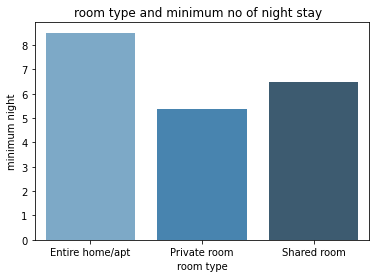

In [24]:
#first plot for room type and mean of minimum_nights
visual1=sns.barplot(x='room_type',y='minimum_nights',data=room__type_min_night,palette="Blues_d")
visual1.set_title('room type and minimum no of night stay  ')
visual1.set_ylabel('minimum night')
visual1.set_xlabel('room type')
visual1.set_xticks(visual1.get_xticks())


In [25]:
#finding the costly neighbourhood group for the giving room type
costly_neighbourhood_group=airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
costly_neighbourhood_group

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,67.098098,59.800000
Brooklyn,177.353474,76.608940,52.115884
Manhattan,246.411907,115.607600,89.377000
Queens,147.228492,68.856750,71.767071
Staten Island,173.846591,62.292553,67.775556


Manhattan have most expensive for the all the giving room type.after google it on map we find it's situated at mid of the country so more denser and also have important financial status so movment of finacial act happend here

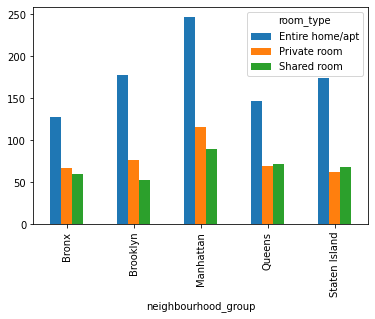

In [26]:
# second plot for finding the costly neighbourhood_group
visual2=costly_neighbourhood_group.plot(kind='bar')
visual2

In [27]:
#ROOM TYPE IN EACH NEIGHBOURHOOD GROUP
room_type_neighbourhood_group=airbnb_df.groupby(['neighbourhood_group','room_type'])['room_type'].count().unstack()
room_type_neighbourhood_group

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


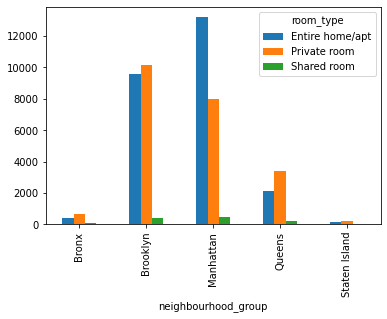

In [28]:
# third plot for room type and neighbourhood_group
visual3=room_type_neighbourhood_group.plot(kind='bar')
visual3

Plot clearly says that shared room are  least populated.that most of the people select privacy and safety over the less price. 

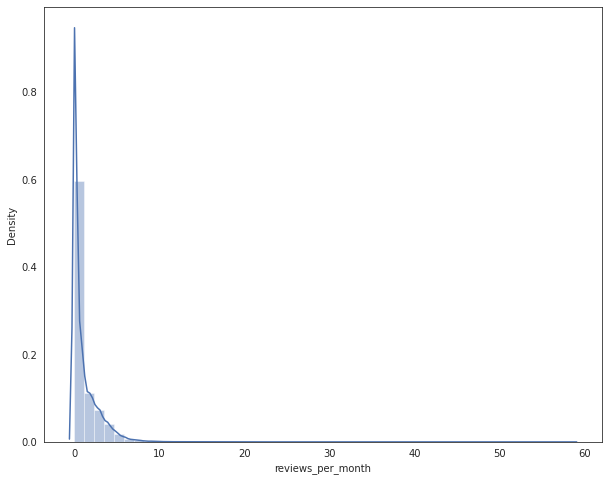

In [94]:
# finding from the review per month
airbnb_df['reviews_per_month']
sns.distplot(airbnb_df['reviews_per_month'])

In [30]:
#find the most busy neighbourhood group
most_busy_neighbour_group=airbnb_df.groupby(['neighbourhood_group'])['reviews_per_month'].mean().reset_index()
most_busy_neighbour_group

,neighbourhood_group,reviews_per_month
0,Bronx,1.475655
1,Brooklyn,1.049790
2,Manhattan,0.976782
3,Queens,1.567076
4,Staten Island,1.576381


Queens and staten island are the most busiest neighbourhood group because of  the average price

In [31]:
#for finding correlation data between price and review per month
niegh_group_traffic_relation=airbnb_df.groupby('neighbourhood_group')['reviews_per_month','price'].mean()
niegh_group_traffic_relation

,reviews_per_month,price
neighbourhood_group,,
Bronx,1.475655,87.681907
Brooklyn,1.049790,124.007536
Manhattan,0.976782,194.731156
Queens,1.567076,97.950187
Staten Island,1.576381,115.061609


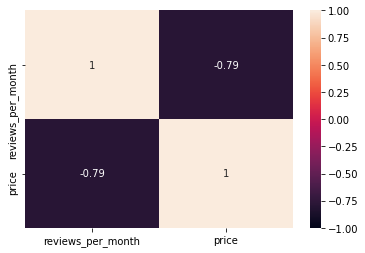

In [32]:
#fourth plot for finding the correlation 
visual4=sns.heatmap(niegh_group_traffic_relation.corr(),vmin=-1,annot=True)
visual4

from the above plot we can understand that demand and price is in a negative correlation with each other.that's why manhttan have the lowest review even it's is more demanding

In [33]:
# insights from the price and reviews per month
price_per_review=airbnb_df[['price','reviews_per_month']]
price_per_review

,price,reviews_per_month
0,149.0,0.21
1,225.0,0.38
2,150.0,0.00
3,89.0,4.64
4,80.0,0.10
...,...,...
48890,70.0,0.00
48891,40.0,0.00
48892,115.0,0.00
48893,55.0,0.00


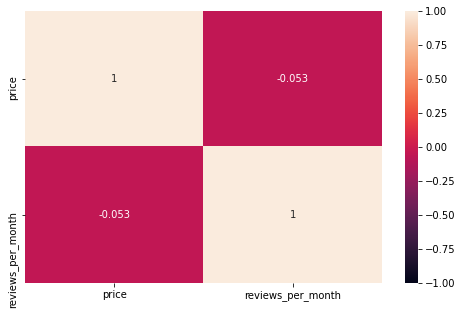

In [34]:
# fifth plot for direct corr between the price and review per month
plt.figure(figsize=(8,5))
visual5=sns.heatmap(price_per_review.corr(),vmin=-1,annot=True)
visual5

The hosts with the most listing count

In [35]:
# creating table for the most call host
host_with_most=airbnb_df[['host_name','calculated_host_listings_count']]
sorted_host_with_most=host_with_most.sort_values('calculated_host_listings_count',ascending=False)
first_three_top=sorted_host_with_most.drop_duplicates(subset=['host_name','calculated_host_listings_count'],keep='first')
final_data=first_three_top[0:3]
final_data

,host_name,calculated_host_listings_count
39773,Sonder (NYC),327
38701,Blueground,232
13039,Kara,121


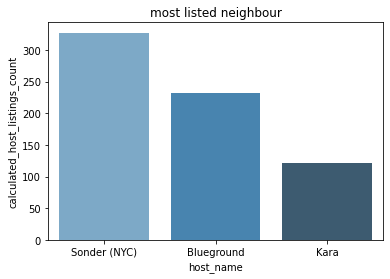

In [36]:
# sixth plot for most listing host
visual6=sns.barplot(x='host_name',y='calculated_host_listings_count',data=final_data,palette="Blues_d")
visual6.set_title('most listed neighbour')
visual6.set_ylabel('calculated_host_listings_count')
visual6.set_xlabel('host_name')
visual6.set_xticks(visual1.get_xticks())


After doing some google research we found that sonder is hotel chain company which used airbnb for listing its property.it's hotel is based on manhatten mostly seven district which is giving below ..  

In [37]:
# finding the unique value from neighbourhood column for sonad hotel chain
sondar_hotel_chain=airbnb_df.loc[airbnb_df['host_name']=='Sonder (NYC)']
sondar_hotel_chain['neighbourhood'].unique()

array(['Financial District', 'Murray Hill', "Hell's Kitchen", 'Midtown',
       'Theater District', 'Chelsea', 'Upper East Side'], dtype=object)

In [38]:
sondar_hotel_chain['room_type'].unique()

array(['Entire home/apt', 'Private room'], dtype=object)

In [39]:
#for analyis the data granularly we creat a each of the neighbourhood group function
nbgh_manhattan=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Manhattan'].reset_index()
nbgh_Bronx=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Bronx'].reset_index()
nbgh_Brooklyn=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Brooklyn'].reset_index()
nbgh_Queens=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Queens'].reset_index()
nbgh_Staten_Island=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Staten Island'].reset_index()

In [40]:
#sorting it by price for each neighbourhood group
most_expensiv_neighbourhood_manhattan=nbgh_manhattan.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().sort_values('price',ascending=False)
most_expensiv_neighbourhood_Bronx=nbgh_Bronx.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().sort_values('price',ascending=False)
most_expensiv_neighbourhood_Brooklyn=nbgh_Brooklyn.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().sort_values('price',ascending=False)
most_expensiv_neighbourhood_Queens=nbgh_Queens.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().sort_values('price',ascending=False)
most_expensiv_neighbourhood_Staten_Island=nbgh_Staten_Island.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().sort_values('price',ascending=False)

In [41]:
#now code for finding top three neighbourhood from each group
top_three_manhattan=most_expensiv_neighbourhood_manhattan[0:3].reset_index()
top_three_Bronx=most_expensiv_neighbourhood_Bronx[0:3].reset_index()
top_three_Brooklyn=most_expensiv_neighbourhood_Brooklyn[0:3].reset_index()
top_three_Queens=most_expensiv_neighbourhood_Queens[0:3].reset_index()
top_three_Staten_Island=most_expensiv_neighbourhood_Staten_Island[0:3].reset_index()

In [42]:
table_top_three_neighbourhood_group=pd.concat([top_three_manhattan,top_three_Bronx,top_three_Brooklyn,top_three_Queens,top_three_Staten_Island],axis=1)

In [43]:
table_top_three_neighbourhood_group

,index,neighbourhood_group,neighbourhood,price,index,neighbourhood_group,neighbourhood,price,index,neighbourhood_group,neighbourhood,price,index,neighbourhood_group,neighbourhood,price,index,neighbourhood_group,neighbourhood,price
0,26,Manhattan,Tribeca,443.214576,34,Bronx,Riverdale,442.090909,40,Brooklyn,Sea Gate,487.857143,36,Queens,Neponsit,274.666667,10,Staten Island,Fort Wadsworth,800.0
1,0,Manhattan,Battery Park City,367.557143,5,Bronx,City Island,173.000000,14,Brooklyn,Cobble Hill,211.929293,7,Queens,Breezy Point,213.333333,42,Staten Island,Woodrow,700.0
2,7,Manhattan,Flatiron District,341.925000,37,Bronx,Spuyten Duyvil,154.750000,8,Brooklyn,Brooklyn Heights,209.064935,27,Queens,Jamaica Estates,182.947368,26,Staten Island,Prince's Bay,409.5


<Figure size 576x360 with 0 Axes>

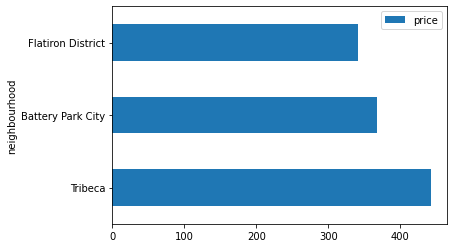

In [44]:
#seventh plot manhattan top three ..
plt.figure(figsize=(8,5))
visual7=top_three_manhattan.plot(x='neighbourhood',y='price',kind='barh')
visual7

<Figure size 576x360 with 0 Axes>

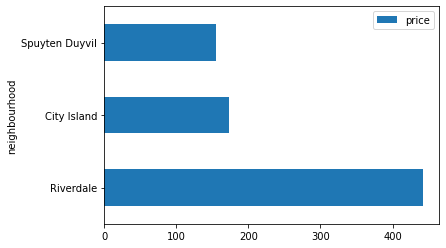

In [45]:
# eight plot for Bronx top three
plt.figure(figsize=(8,5))
visual8=top_three_Bronx.plot(x='neighbourhood',y='price',kind='barh')
visual8

<Figure size 576x360 with 0 Axes>

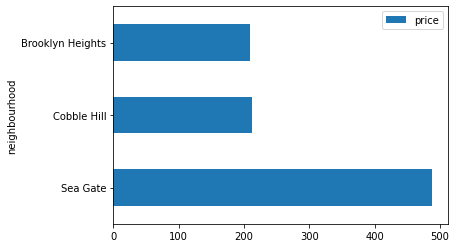

In [46]:
# nine plot for Brooklyn top three
plt.figure(figsize=(8,5))
visual9=top_three_Brooklyn.plot(x='neighbourhood',y='price',kind='barh')
visual9

<Figure size 576x360 with 0 Axes>

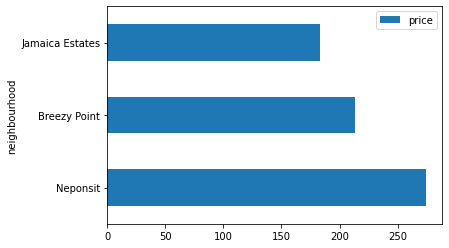

In [47]:
# tenth plot for Queens top three
plt.figure(figsize=(8,5))
visual10=top_three_Queens.plot(x='neighbourhood',y='price',kind='barh')
visual10

<Figure size 576x360 with 0 Axes>

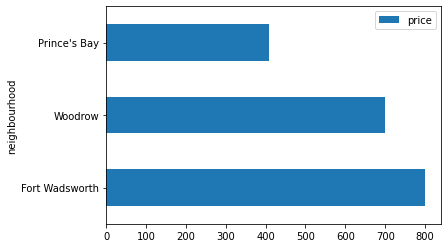

In [48]:
# eleventh plot for Staten_Island top three
plt.figure(figsize=(8,5))
visual11=top_three_Staten_Island.plot(x='neighbourhood',y='price',kind='barh')
visual11

In [49]:
# checking for the next data analysis 
airbnb_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0


In [50]:
# most traffic in a perticular neghbourhood_group
niegh_group_traffic_relation=airbnb_df.groupby('neighbourhood_group')['reviews_per_month','price'].mean()
niegh_group_traffic_relation

,reviews_per_month,price
neighbourhood_group,,
Bronx,1.475655,87.681907
Brooklyn,1.049790,124.007536
Manhattan,0.976782,194.731156
Queens,1.567076,97.950187
Staten Island,1.576381,115.061609


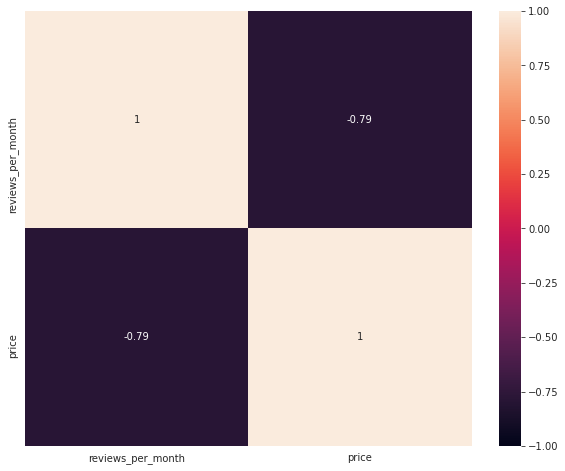

In [88]:
visual12=sns.heatmap(niegh_group_traffic_relation.corr(),vmin=-1,annot=True)
visual12

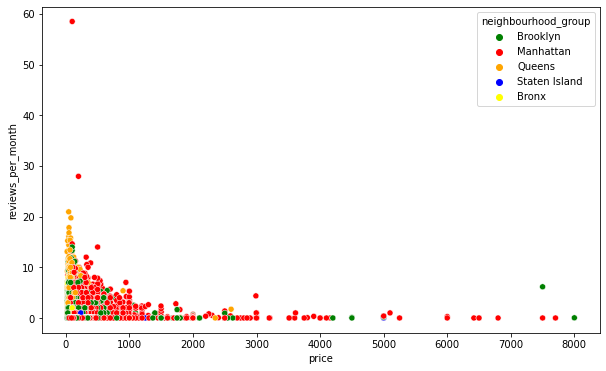

In [52]:
plt.figure(figsize=(10,6))
visula13=sns.scatterplot(x='price',y='reviews_per_month',hue='neighbourhood_group',palette=['green','red','orange','blue','yellow'],legend='full',data=airbnb_df)
visula13


In [53]:
# room type availabilty relation
room_type_avail=airbnb_df.groupby('room_type')['availability_365'].mean().reset_index()
room_type_avail

,room_type,availability_365
0,Entire home/apt,111.920304
1,Private room,111.203933
2,Shared room,162.000862


<Figure size 720x360 with 0 Axes>

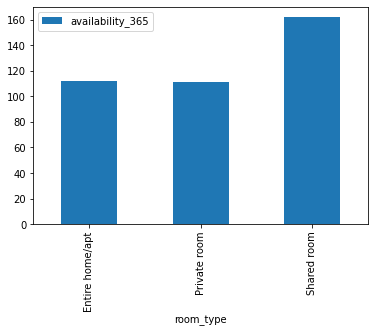

In [54]:
plt.figure(figsize=(10,5))
visual14=room_type_avail.plot(x='room_type',y='availability_365',kind='bar')
visual14

Inside the Neighbourhood

In [55]:
#let's examin some intrested unique neighbourhood value
airbnb_df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [56]:
#out of 48894 their are how much no of unique value for the respective neighbourhood
len(airbnb_df.neighbourhood.unique())

221

In [57]:
#let's examin some intrested unique room_type value
airbnb_df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [58]:
room__type_count=airbnb_df.groupby(airbnb_df['room_type']).count().reset_index()  # collecting count respect to room type
room__type_count

,room_type,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Entire home/apt,25402,25409,25400,25409,25409,25409,25409,25409,25409,25409,25409,25409,25409
1,Private room,22318,22326,22314,22326,22326,22326,22326,22326,22326,22326,22326,22326,22326
2,Shared room,1159,1160,1160,1160,1160,1160,1160,1160,1160,1160,1160,1160,1160


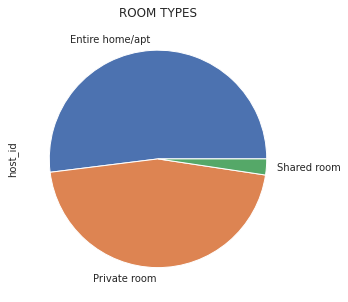

In [85]:
room__type_count.index=room__type_count['room_type']
visual15=room__type_count.plot.pie(y='host_id',legend=False,title='ROOM TYPES',figsize=(10,5))
visual15

In [60]:
#calculate the most listed  host id who takes maximum benifits from this platform 
top_host=airbnb_df.host_id.value_counts().head(10).reset_index()

In [61]:
top_host

,index,host_id
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


In [62]:
# finding with already existing columns
top_host_check=airbnb_df.calculated_host_listings_count.max()

In [63]:
top_host_check

327

In [64]:
#setting size of the figure for the future visualization
sns.set({'figure.figsize':(10,8)})
sns.set_style('white')

In [65]:
top_host_df=pd.DataFrame(top_host)
top_host_df

,index,host_id
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


In [66]:
top_host_df.reset_index(inplace=True)
top_host_df

,level_0,index,host_id
0,0,219517861,327
1,1,107434423,232
2,2,30283594,121
3,3,137358866,103
4,4,12243051,96
5,5,16098958,96
6,6,61391963,91
7,7,22541573,87
8,8,200380610,65
9,9,7503643,52


In [67]:
top_host_df.rename(columns={'index':'T-host','host_id':'host_Value'},inplace=True)

In [68]:
top_host_df

,level_0,T-host,host_Value
0,0,219517861,327
1,1,107434423,232
2,2,30283594,121
3,3,137358866,103
4,4,12243051,96
5,5,16098958,96
6,6,61391963,91
7,7,22541573,87
8,8,200380610,65
9,9,7503643,52


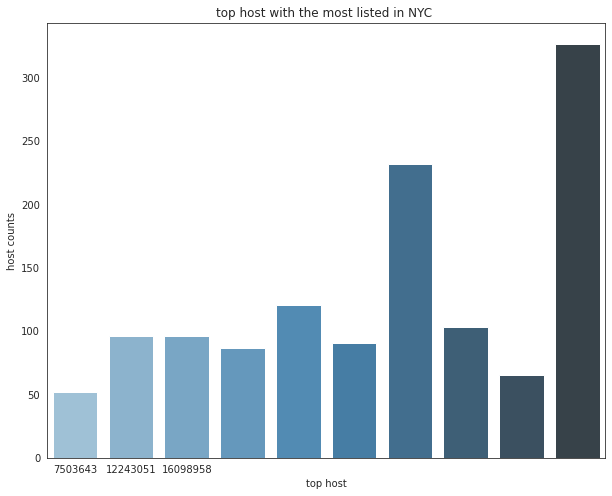

In [69]:
visual6=sns.barplot(x='T-host',y='host_Value',data=top_host_df,palette="Blues_d")
visual6.set_title('top host with the most listed in NYC ')
visual6.set_ylabel('host counts')
visual6.set_xlabel('top host')
visual6.set_xticks(visual1.get_xticks())


In [70]:
#insights from our neighbourhood 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx
#for Brooklyn
price_1=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Brooklyn']
price_1list=price_1[['price']]
#'Manhattan
price_2=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Manhattan']
price_2list=price_2[['price']]
#'Queens
price_3=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Queens']
price_3list=price_3[['price']]
#'Staten island
price_4=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Staten Island']
price_4list=price_4[['price']]
#Bronx
price_5=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Bronx']
price_5list=price_5[['price']]
final_price_list=[price_1list,price_2list,price_3list,price_4list,price_5list]

In [71]:
final_price_list   #give us raw data

[       price
 0      149.0
 3       89.0
 6       60.0
 12      89.0
 15     140.0
 ...      ...
 48882   40.0
 48884  190.0
 48887  170.0
 48890   70.0
 48891   40.0
 
 [20104 rows x 1 columns],        price
 1      225.0
 2      150.0
 4       80.0
 5      200.0
 7       79.0
 ...      ...
 48886  200.0
 48888  125.0
 48892  115.0
 48893   55.0
 48894   90.0
 
 [21661 rows x 1 columns],        price
 46     130.0
 77      70.0
 143    140.0
 161     79.0
 181    350.0
 ...      ...
 48858   68.0
 48863   93.0
 48866   58.0
 48878   45.0
 48889   65.0
 
 [5666 rows x 1 columns],        price
 169     70.0
 249     36.0
 250     37.0
 251     37.0
 256     36.0
 ...      ...
 48441   40.0
 48446  100.0
 48533  450.0
 48649   54.0
 48799  235.0
 
 [373 rows x 1 columns],        price
 171     40.0
 207     45.0
 260     90.0
 261    105.0
 309     90.0
 ...      ...
 48783  140.0
 48792   80.0
 48795  125.0
 48796   70.0
 48805  100.0
 
 [1091 rows x 1 columns]]

In [72]:
# known values in neighbourhood_group column by using for loop creating a stats table
list_of_price=[]
new_list=['Brooklyn','Manhattan','Queens','Staten Island','Bronx']

for x in final_price_list:
    a=x.describe(percentiles=[0.25, 0.50, 0.75])
    a=a.iloc[3:]
    a.reset_index(inplace=True)
    a.rename(columns={'index':'Stats'}, inplace=True)
    list_of_price.append(a)
# names of the price column to the area name for easier reading of the table       
list_of_price[0].rename(columns={'price':new_list[0]}, inplace=True)
list_of_price[1].rename(columns={'price':new_list[1]}, inplace=True)
list_of_price[2].rename(columns={'price':new_list[2]}, inplace=True)
list_of_price[3].rename(columns={'price':new_list[3]}, inplace=True)
list_of_price[4].rename(columns={'price':new_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=list_of_price
stat_df=[df.set_index('Stats') for df in stat_df]    #list comprihension for
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,20.0,20.0,20.0,20.0,20.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,8000.0,7703.0,2600.0,5000.0,2500.0


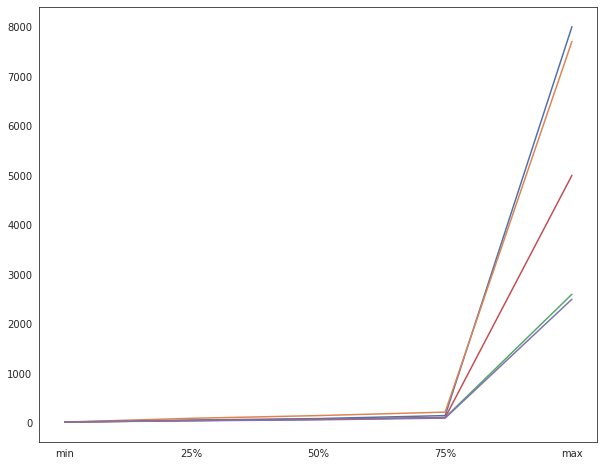

In [83]:
plt.plot(stat_df);

In [73]:
#after seeing statistic table we can easily observ that we have some extream value so for we need to remove it for better visualisation 
# creating a sub data frame with value less than 500
sub_data=airbnb_df[airbnb_df.price<500]
sub_data 

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,0.00,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,0.00,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,0.00,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,0.00,6,2


In [74]:
#fining the top ten neighbourhood
airbnb_df.neighbourhood.value_counts().head(11).reset_index()

,index,neighbourhood
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


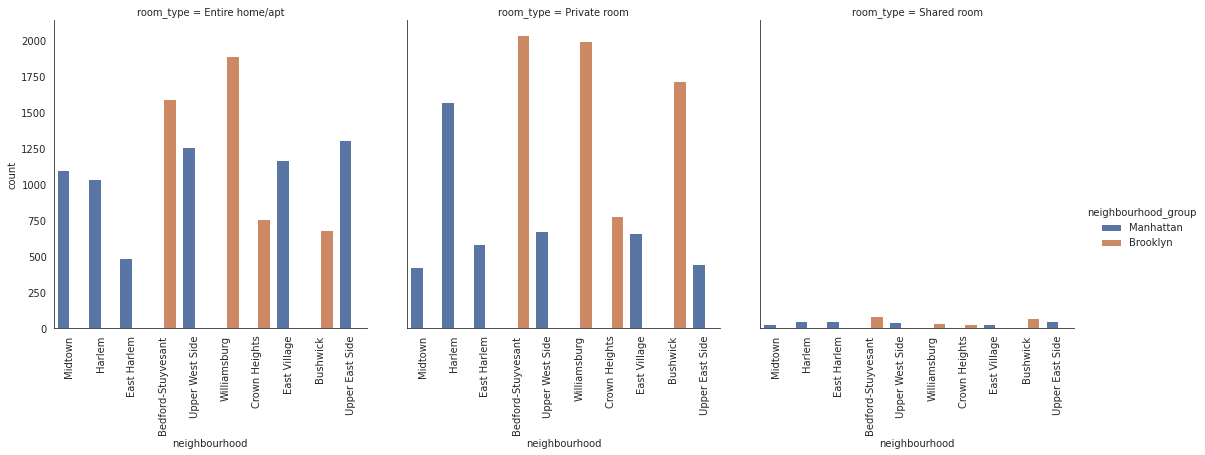

In [75]:
#combine this data with roomtype for inrich the visualisation
sub_data2=airbnb_df.loc[airbnb_df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\s kitchen','East Village','Upper East Side','Crown Heights','Midtown','East Harlem'])]
#using catplot to represnting mutltiple atribute together
visual17=sns.catplot(x='neighbourhood',hue='neighbourhood_group',col='room_type',data=sub_data2,kind='count')
visual17.set_xticklabels(rotation=90)

**what we can see from the above 3 sub plots.we can make comparision of distribution of attributes.y-axis and x-axis are same in both the plot.in the y-axis we take count and on the x-axis we take observation we want like here neighbourhoodtheir are two more important element:column and hue.after specifying the column and determining the hue we are able to compair and observe the y-axis and x-axis among the specified column as well colour-code.so basically what we observerd the shared room type have less no of intrest.we can seen from the top 10 neighbourhood only Manhattan and Brooklyn are the most travel destination theirfore would have the most listing availability.we can also observed Bedford-stuyvesent and williamsburg are most populated from Manhattan and harlem from Brooklyn**

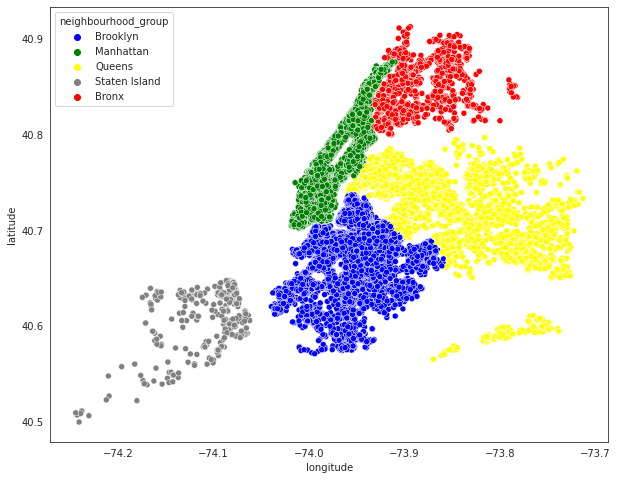

In [76]:
# now take some insights from longitude and latitude
#let's draw scatter plot 
plt.figure(figsize=(10,8))
visual18 =sns.scatterplot(x="longitude", y="latitude", hue="neighbourhood_group",palette=['blue','green','yellow','grey','red'], legend='full',data=sub_data)

At the End of jouney now we have extract some usefull Elusive from the giving data.
now we can suggest for Airbnb CEO with some Exquisite conclusion



*   Most airbnb is located in Mnahattan and Brooklyn. Due to capital income state Manhattan is most Expensive.
*after looking for correlation and price and demand table we can say that Queen is most afforadable neighbourhood_group.
*Correltion graph shows that in the U.S prefer privacy then the price.so the private room is most preferable room type.
*correlation between price and review per show that paying extra always be less satisfaction so airbnb with more review be affordable than average.but not a strong correlation their.



After reading  please all team members please update your usefull suggestion

*  Rohit bhadauriya-Manhattan should reduce the price bar for the affordable range for increasing their review mark and as the shared have less no of call from the customer side so i think the neighbourhood or the hotel chain should remove it from the list.

*   List item

